# 1. Importing and Cleaning the data

In [54]:
# Importing Libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns                               
import locale
import os


In [55]:
# Load the JSON data from the file

file_path = os.path.expanduser('data.json')
with open(file_path) as f:
    data = json.load(f)

In [56]:
# Function to clean exchange data

def clean_exchange_data(exchange_data, exchange_name):
    """
    Cleans and extracts relevant data from the exchange data.

    Args:
        exchange_data (dict): The raw exchange data.
        exchange_name (str): The name of the exchange.

    Returns:
        dict: A dictionary containing cleaned data.
    """
    cleaned_data = {
        f'{exchange_name}_24h_volume': str(int(float(exchange_data[f'{exchange_name}_volume'][0].replace('$', '').replace(',', '')))),
        f'{exchange_name}_24h_volume_in_btc': exchange_data[f'{exchange_name}_volume_in_btc'][0].replace(',', ''),
        f'{exchange_name}_7d_volume': exchange_data.get('7d_volume', '0').replace('$', '').replace(',', ''),  # handle missing key
        f'{exchange_name}_total_cryptocurrencies': exchange_data[f'{exchange_name}_total_cryptocurrencies'][0],
        f'{exchange_name}_monthly_traffic': exchange_data.get('mo_organic_traffic', '0').replace(',', ''),  # handle missing key
        f'{exchange_name}_ahref_ranking': exchange_data.get('ahref_ranking', '0').replace(',', ''),  # handle missing key
        f'{exchange_name}_markets_no': exchange_data[f'{exchange_name}_markets'][0],
        f'{exchange_name}_market_dominance': exchange_data[f'{exchange_name}_market_dominance'][0].replace('%', ''),
        f'{exchange_name}_rank': exchange_data[f'{exchange_name}_market_rank'][0].replace('#', ''),
        f'{exchange_name}_markets': exchange_data['markets'],
        f'{exchange_name}_market_base_coins': [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in exchange_data['markets']],
        f'{exchange_name}_market_names': [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in exchange_data['markets']],
        f'{exchange_name}_market_volumes': [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in exchange_data['markets']],
        f'{exchange_name}_market_volumes_percentage': [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '') for market in exchange_data['markets']]
    }
    return cleaned_data

# Function to calculate total market volume
def calculate_total_market_volume(market_volumes):
    """
    Calculates the total market volume from a list of market volumes.

    Args:
        market_volumes (list): A list of market volumes as strings.

    Returns:
        int: The total market volume.
    """
    total_volume = sum(int(volume) for volume in market_volumes)
    return total_volume


In [57]:
# Extract and clean data for each exchange
btcturk_data = data[0]['btcturk']
binance_data = data[1]['binance']
paribu_data = data[2]['Paribu']

cleaned_btcturk_data = clean_exchange_data(btcturk_data, 'btcturk')
cleaned_binance_data = clean_exchange_data(binance_data, 'binance')
cleaned_paribu_data = clean_exchange_data(paribu_data, 'paribu')


In [58]:
# Calculate total market volume for each exchange
binance_total_market_volume = calculate_total_market_volume(cleaned_binance_data['binance_market_volumes'])
btcturk_total_market_volume = calculate_total_market_volume(cleaned_btcturk_data['btcturk_market_volumes'])
paribu_total_market_volume = calculate_total_market_volume(cleaned_paribu_data['paribu_market_volumes'])


---

# 2. Creating DataFrames

In [66]:
# Create a DataFrame

exchange_data = pd.DataFrame({
    'Exchange': ['Binance', 'BtcTurk', 'Paribu'],
    '24H Volume($)': [cleaned_binance_data['binance_24h_volume'], cleaned_btcturk_data['btcturk_24h_volume'], cleaned_paribu_data['paribu_24h_volume']],
    '24H Volume(BTC)': [cleaned_binance_data['binance_24h_volume_in_btc'], cleaned_btcturk_data['btcturk_24h_volume_in_btc'], cleaned_paribu_data['paribu_24h_volume_in_btc']],
    '7D Volume($)': [cleaned_binance_data['binance_7d_volume'], cleaned_btcturk_data['btcturk_7d_volume'], cleaned_paribu_data['paribu_7d_volume']],
    'Total Cryptocurrencies': [cleaned_binance_data['binance_total_cryptocurrencies'], cleaned_btcturk_data['btcturk_total_cryptocurrencies'], cleaned_paribu_data['paribu_total_cryptocurrencies']],
    'Number of Markets': [cleaned_binance_data['binance_markets_no'], cleaned_btcturk_data['btcturk_markets_no'], cleaned_paribu_data['paribu_markets_no']],
    'Exchange Rank': [cleaned_binance_data['binance_rank'], cleaned_btcturk_data['btcturk_rank'], cleaned_paribu_data['paribu_rank']],
    'Exchange Dominance among all Exchanges': [cleaned_binance_data['binance_market_dominance'], cleaned_btcturk_data['btcturk_market_dominance'], cleaned_paribu_data['paribu_market_dominance']],
    'Monthly Website Traffic': [cleaned_binance_data['binance_monthly_traffic'], cleaned_btcturk_data['btcturk_monthly_traffic'], cleaned_paribu_data['paribu_monthly_traffic']],
    'Ahref Ranking': [cleaned_binance_data['binance_ahref_ranking'], cleaned_btcturk_data['btcturk_ahref_ranking'], cleaned_paribu_data['paribu_ahref_ranking']]
})


In [73]:
# Transform data types

exchange_data['Exchange'] = df_exchange_data['Exchange'].astype('category')
exchange_data['24H Volume($)'] = df_exchange_data['24H Volume($)'].astype('int')
exchange_data['24H Volume(BTC)'] = df_exchange_data['24H Volume(BTC)'].astype('int')
exchange_data['7D Volume($)'] = df_exchange_data['7D Volume($)'].astype('int')
exchange_data['Total Cryptocurrencies'] = df_exchange_data['Total Cryptocurrencies'].astype('int')
exchange_data['Number of Markets'] = df_exchange_data['Number of Markets'].astype('int')
exchange_data['Exchange Rank'] = df_exchange_data['Exchange Rank'].astype('int')
exchange_data['Exchange Dominance among all Exchanges'] = df_exchange_data['Exchange Dominance among all Exchanges'].astype('float')
exchange_data['Monthly Website Traffic'] = df_exchange_data['Monthly Website Traffic'].astype('int')
exchange_data['Ahref Ranking'] = df_exchange_data['Ahref Ranking'].astype('int')


In [75]:
exchange_data.head()

,Exchange,24H Volume($),24H Volume(BTC),7D Volume($),Total Cryptocurrencies,Number of Markets,Exchange Rank,Exchange Dominance among all Exchanges,Monthly Website Traffic,Ahref Ranking
0,Binance,740154759,10863,0,178,201,21,0.33,172027,296536
1,BtcTurk,584310676,8576,0,108,208,93,0.26,20235,208255
2,Paribu,337287125,4950,0,145,152,122,0.15,724411,188513


In [74]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Exchange                                3 non-null      category
 1   24H Volume($)                           3 non-null      int64   
 2   24H Volume(BTC)                         3 non-null      int64   
 3   7D Volume($)                            3 non-null      int64   
 4   Total Cryptocurrencies                  3 non-null      int64   
 5   Number of Markets                       3 non-null      int64   
 6   Exchange Rank                           3 non-null      int64   
 7   Exchange Dominance among all Exchanges  3 non-null      float64 
 8   Monthly Website Traffic                 3 non-null      int64   
 9   Ahref Ranking                           3 non-null      int64   
dtypes: category(1), float64(1), int64(8)
memory usage: 483

---
# 3. Visualizing the data

/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_17353/2153623912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Exchange', y='24H Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'].tolist())


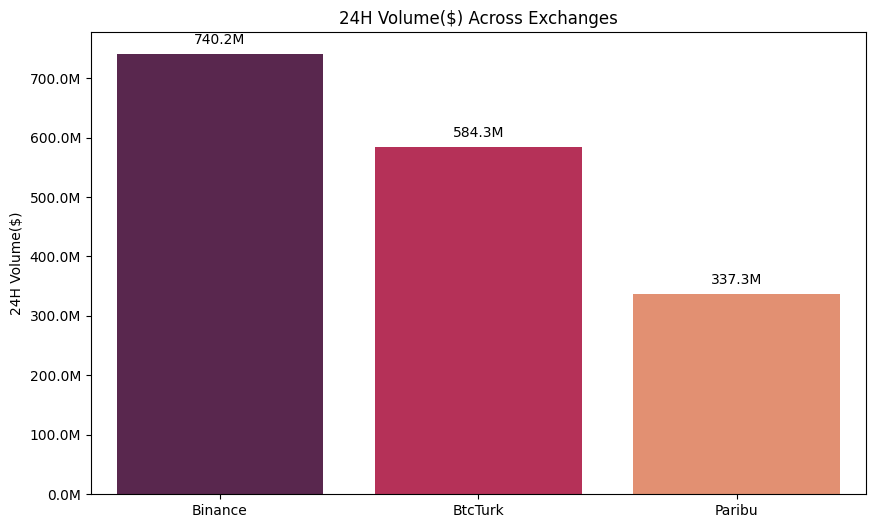

In [95]:
# Ensure df_exchange_data is sorted correctly
exchange_data = exchange_data.sort_values(by='24H Volume($)', ascending=False)

# Create a custom formatter function
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='24H Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'].tolist())

# Customize y-axis labels to represent values in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Annotate each bar with its value in millions
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1e6:.1f}M', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title('24H Volume($) Across Exchanges')
plt.ylabel('24H Volume($)')
plt.xlabel('')
plt.show()


/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_17353/622547555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Exchange', y='24H Volume(BTC)', data=exchange_data, palette='rocket', order=exchange_data['Exchange'])


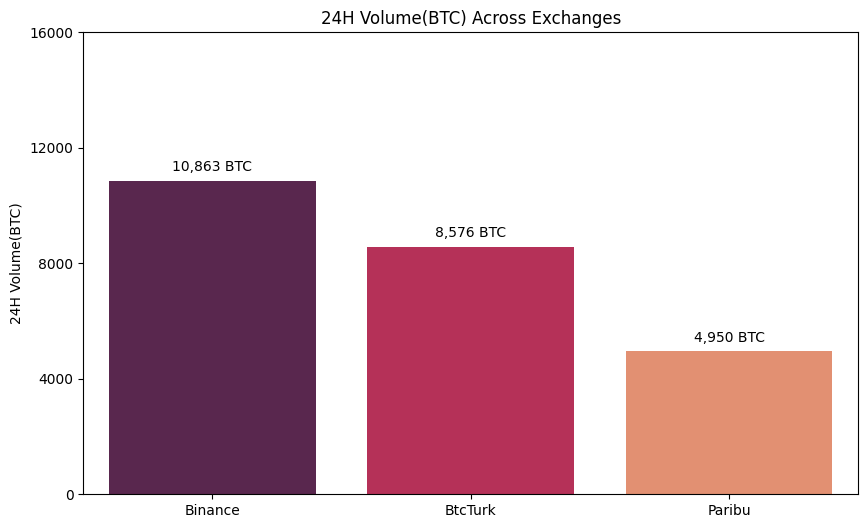

In [96]:
exchange_data = exchange_data.sort_values(by='24H Volume(BTC)', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='24H Volume(BTC)', data=exchange_data, palette='rocket', order=exchange_data['Exchange'])

# Customize y-axis ticks to represent specific values
ax.set_yticks([0, 4000, 8000, 12000, 16000])

# Annotate each bar with its value formatted with commas and append "BTC"
for p in ax.patches:
    height = p.get_height()
    formatted_value = '{:,.0f}'.format(height)  # Add commas as thousands separators
    ax.annotate(f'{formatted_value} BTC', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('24H Volume(BTC) Across Exchanges')
plt.ylabel('24H Volume(BTC)')
plt.xlabel('')
plt.show()


/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_17353/3849681495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Exchange', y='Exchange Rank', data=exchange_data, palette='rocket', order=exchange_data['Exchange'].tolist())


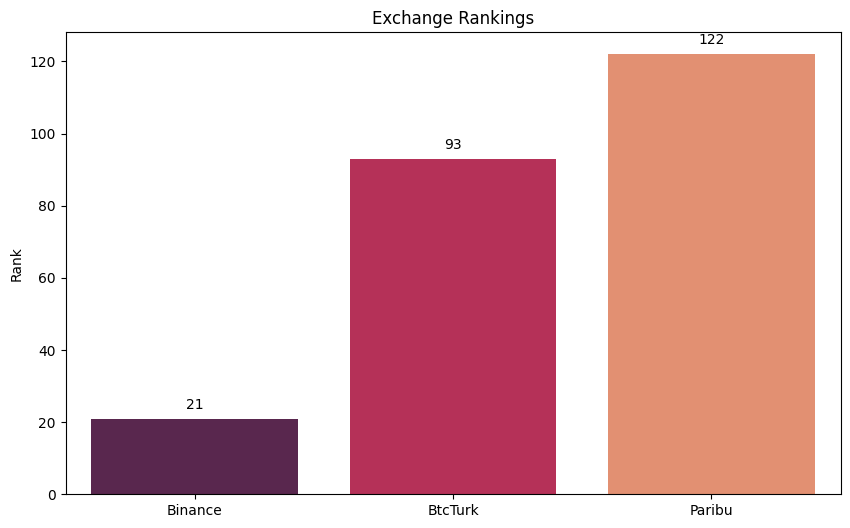

In [99]:
# Ensure df_exchange_data is sorted by rank
exchange_data = exchange_data.sort_values(by='Exchange Rank')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='Exchange Rank', data=exchange_data, palette='rocket', order=exchange_data['Exchange'].tolist())

# Annotate each bar with its rank value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

# Remove x-axis label
ax.set_xlabel('')

plt.title('Exchange Rankings')
plt.ylabel('Rank')
plt.show()


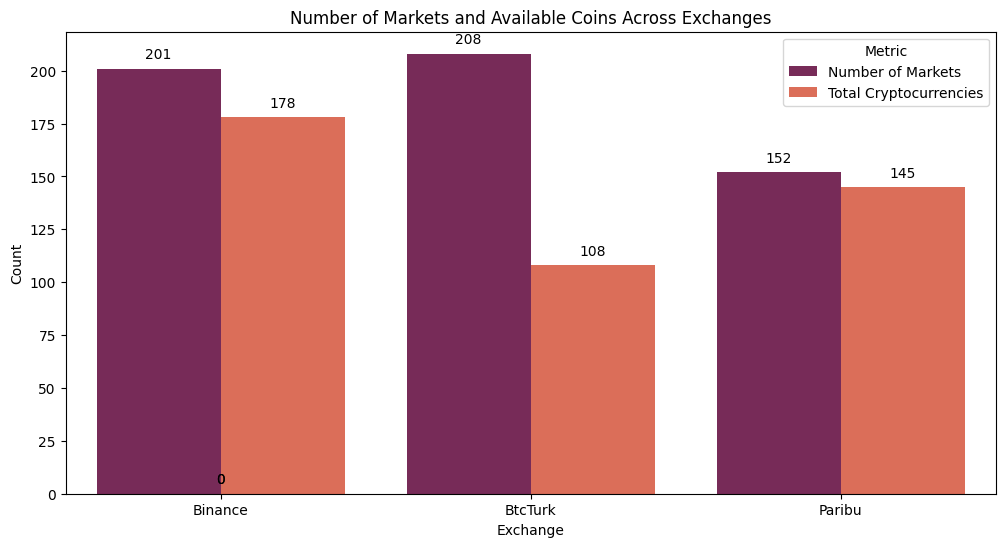

In [100]:
# Prepare data
exchange_data = exchange_data.sort_values(by='Exchange')  # Sort by exchange name for consistency
data_melted = exchange_data.melt(id_vars='Exchange', value_vars=['Number of Markets', 'Total Cryptocurrencies'], 
                                 var_name='Metric', value_name='Value')

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Exchange', y='Value', hue='Metric', data=data_melted, palette='rocket')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Number of Markets and Available Coins Across Exchanges')
plt.xlabel('Exchange')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.show()